In [104]:
import pandas as pd
import seaborn as sns

In [105]:
df = pd.read_html("https://www.theramenrater.com/resources-2/the-list/")[0].drop("T", axis=1)
df.shape

(3132, 6)

In [109]:
df["Stars"] = pd.to_numeric(df["Stars"], errors = "coerce")
df.set_index("Review #", inplace=True)

In [118]:
df.dropna(inplace=True)
df = df[::-1]
df.tail()

,Brand,Variety,Style,Country,Stars
Review #,,,,,
3128,Kinchan,Kinchan Noodle,Cup,Japan,5.0
3129,Acecook,Super Cup Pringles Sour Cream & Onion Yakisoba,Tray,Japan,0.0
3130,Master Kong,Golden Stock Shrimp Noodles,Bowl,China,5.0
3131,TTL,Spicy Pork With Rice Wine,Pack,Taiwan,5.0
3132,Liangchengmei,Biang Biang Men,Box,China,5.0


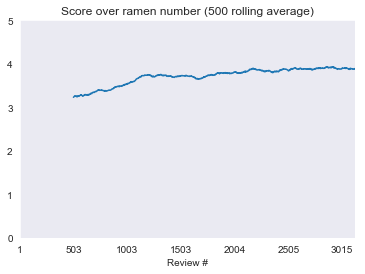

In [176]:
sns.set_style("dark")
df["Stars"].rolling(500).mean().plot(ylim=(0,5), title="Score over ramen number (500 rolling average)")


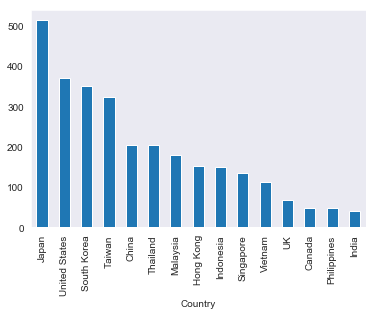

In [187]:
import numpy as np
by_country = df.groupby("Country").agg(["count", np.mean]).sort_values(("Stars","count"), ascending=False)[:15]
by_country[("Stars","count")].plot(kind="bar")

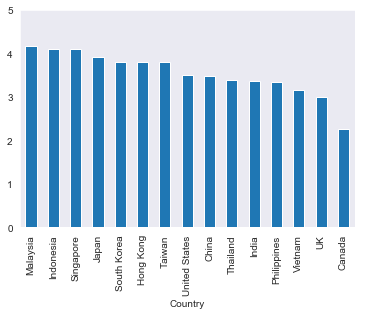

In [188]:
by_country.sort_values(("Stars","mean"), ascending=False)[("Stars","mean")].plot(kind="bar", ylim=(0,5))

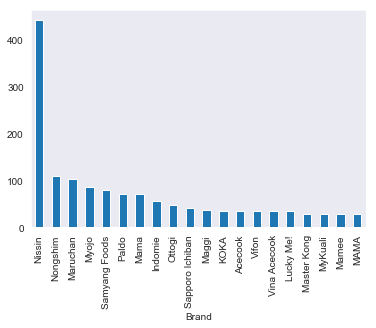

In [203]:
by_brand = df.groupby("Brand").agg(["count", np.mean]).sort_values(("Stars","count"), ascending=False)[:20]
by_brand[("Stars","count")].plot(kind="bar")

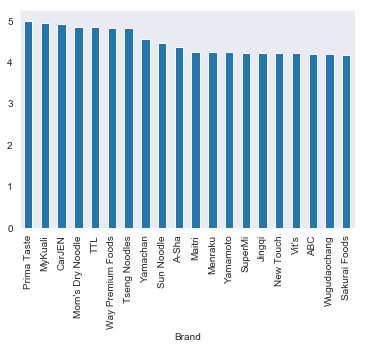

In [218]:
by_brand_best = df.groupby("Brand").agg(["count", np.mean]).sort_values(("Stars","mean"), ascending=False)
by_brand_best[by_brand_best[("Stars","count")]>5][("Stars","mean")][:20].plot(kind="bar")

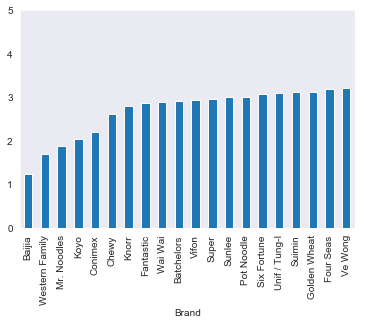

In [216]:
by_brand_worst = df.groupby("Brand").agg(["count", np.mean]).sort_values(("Stars","mean"), ascending=True)
by_brand_worst[by_brand_worst[("Stars","count")]>5][("Stars","mean")][:20].plot(kind="bar",ylim=(0,5))

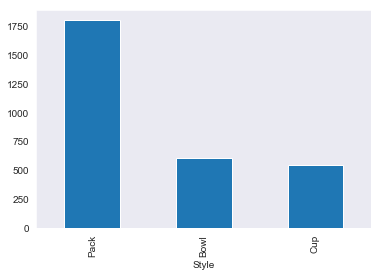

In [212]:
by_style = df.groupby("Style").agg(["count", np.mean]).sort_values(("Stars","count"), ascending=False)[:3]
by_style[("Stars","count")].plot(kind="bar")

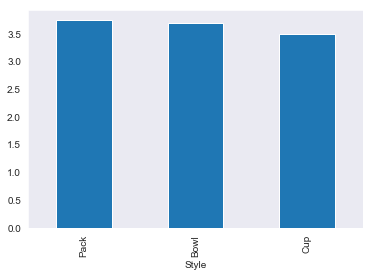

In [213]:
by_style[("Stars","mean")].plot(kind="bar")